# Python :Courseproject:Machine Learning(DataScience-PGC,InternshalaTrainings)

### 1. Your views about the problem statement?

The problem statement appears to involve predicting the Cost to Company (CTC) for individuals based on various features such as college tier, city type, and role. This is a regression problem, where the goal is to build a model that accurately predicts a continuous target variable (CTC in this case). The dataset includes information about colleges, cities, roles, and CTC, and the task is to develop a machine learning model that can generalize well to new, unseen data.

### 2. What will be your approach to solving this task?

The approach to solving this task involves several key steps:

- **Data Loading:** Loading the main dataset along with additional datasets for cities and colleges.

- **Data Preprocessing:** Processing categorical variables such as college tier, city type, and role to convert them into numerical format suitable for machine learning models.

- **Visualizations:** Creating visualizations, such as bar plots for feature importance and predicted vs. actual plots, to better understand the model's behavior.

- **Feature Scaling:** Standardizing the features using StandardScaler to ensure that all features have the same scale, which is particularly important for linear models.

- **Model Selection:** Trying different regression models, including Linear Regression, Lasso Regression, Ridge Regression, Random Forest Regressor, and AdaBoost Regressor.

- **Model Evaluation:** Evaluating each model's performance using metrics like R-squared and Mean Squared Error on a test set.

- **Hyperparameter Tuning:** Fine-tuning the hyperparameters of selected models using GridSearchCV to potentially improve performance.



### 3. What were the available ML model options you had to perform this task?

The available machine learning models used in this analysis include:

- **Linear Regression:** A simple linear model that assumes a linear relationship between the input features and the target variable.

- **Lasso Regression:** A linear regression model with L1 regularization, which can be useful for feature selection.

- **Ridge Regression:** Similar to Lasso, but with L2 regularization.

- **Random Forest Regressor:** An ensemble model that builds multiple decision trees and combines their predictions.

- **AdaBoost Regressor:** Another ensemble model that combines weak learners to create a strong learner.

### 4. Which model’s performance is best and what could be the possible reason for that?

The best-performing model in this analysis is the **Random Forest Regressor** after hyperparameter tuning. The performance metric used is R-squared, which measures the proportion of the variance in the dependent variable that is predictable from the independent variables.

**R-square value here is =>**

**R-squared:** 0.6373900596965291 

**Best Hyperparameters:** {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Possible reasons for Random Forest's superior performance:

- **Ensemble Nature:** Random Forest combines multiple decision trees, reducing overfitting and improving generalization to unseen data.

- **Feature Importance:** Random Forest inherently provides a measure of feature importance, allowing the model to focus on the most relevant features for prediction.

- **Flexibility:** Random Forest can capture complex relationships in the data and handle non-linearity.

### 5. What steps can you take to improve this selected model’s performance even further?

To further improve the performance of the Random Forest Regressor or any machine learning model, you can consider the following steps:

- **Feature Engineering:** Create new features that might provide additional information to the model.

- **More Advanced Techniques:** Explore more advanced ensemble techniques, such as Gradient Boosting, or deep learning models, depending on the dataset size and complexity.

- **Data Augmentation:** If applicable, consider augmenting the dataset with additional relevant data.

- **Fine-tuning Hyperparameters:** Further fine-tune the hyperparameters using a more comprehensive search space or more advanced optimization techniques.

- **Cross-Validation:** Use cross-validation to get a more robust estimate of the model's performance.

- **Handling Outliers:** Check for and handle outliers in the data that might be impacting the model's performance.

- **Ensemble Methods:** Consider creating an ensemble of different models to leverage their individual strengths.

It's essential to note that the choice of improvement steps depends on the specific characteristics of the data and the problem at hand. Experimentation and iteration are crucial in finding the best possible model.

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import seaborn as sns


# Data loading  :
# Load the main dataset
data = pd.read_csv('ML case Study.csv')  

# Load the cities data
cities_data = pd.read_csv('cities.csv')  

# Load the colleges data
colleges_data = pd.read_csv('Colleges.csv')  

print('Before processing :-\n',data.head())

# Data Pre-processing  :
Tier1=colleges_data["Tier 1"].tolist()
Tier2=colleges_data["Tier 2"].tolist()
Tier3=colleges_data["Tier 3"].tolist()
Tier1 = [value for value in Tier1 if not pd.isna(value)]
Tier2 = [value for value in Tier2 if not pd.isna(value)]
Tier3 = [value for value in Tier3 if not pd.isna(value)]

for item in data.College:
    if item in Tier1:
        data["College"].replace(item,1,inplace=True)
    elif item in Tier2:
        data["College"].replace(item,2,inplace=True)
    elif item in Tier3:
        data["College"].replace(item,3,inplace=True)
# 1= Tier1
# 2= Tier2
# 3= Tier3



metro=cities_data["Metro City"].tolist()
nonmetro=cities_data["non-metro cities"].tolist()
metro = [value for value in metro if not pd.isna(value)]
nonmetro = [value for value in nonmetro if not pd.isna(value)]
#nonmetro1 = [value for value in Tier3 if not pd.isna(value)]
nonmetro

for item in data.City:
    if item in metro:
        data["City"].replace(item,0,inplace=True)
    elif item in nonmetro:
        data["City"].replace(item,1,inplace=True)
        
# 0= Metro Cities
# 1= Non Metro Cities

for item in data.Role:
    if item =='Manager':
        data["Role"].replace(item,0,inplace=True)
    elif item =='Executive':
        data["Role"].replace(item,1,inplace=True)
data.head(200)

#0= Manager
#1= Executive

print('*************************************************************************************************************')
print(data.info())
print('*************************************************************************************************************')

X = data.drop(['CTC'], axis=1)
y = data['CTC']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print('After preprocessing :-')
data.head()

Before processing :-
              College             City       Role  Previous CTC  \
0        SVNIT Surat          Asansol    Manager       55523.0   
1         NIT Bhopal            Ajmer  Executive       57081.0   
2       IEM, Kolkata  Rajpur Sonarpur  Executive       60347.0   
3  KIIT, Bhubaneswar            Ajmer  Executive       49010.0   
4                DTU         Durgapur  Executive       57879.0   

   Previous job change  Graduation Marks  EXP (Month)       CTC  
0                    3                66           19  71406.58  
1                    1                84           18  68005.87  
2                    2                52           28  76764.02  
3                    2                81           33  82092.39  
4                    4                74           32  73878.10  
*************************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
D

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,1,0,55523.0,3,66,19,71406.58
1,2,1,1,57081.0,1,84,18,68005.87
2,3,1,1,60347.0,2,52,28,76764.02
3,3,1,1,49010.0,2,81,33,82092.39
4,1,1,1,57879.0,4,74,32,73878.10


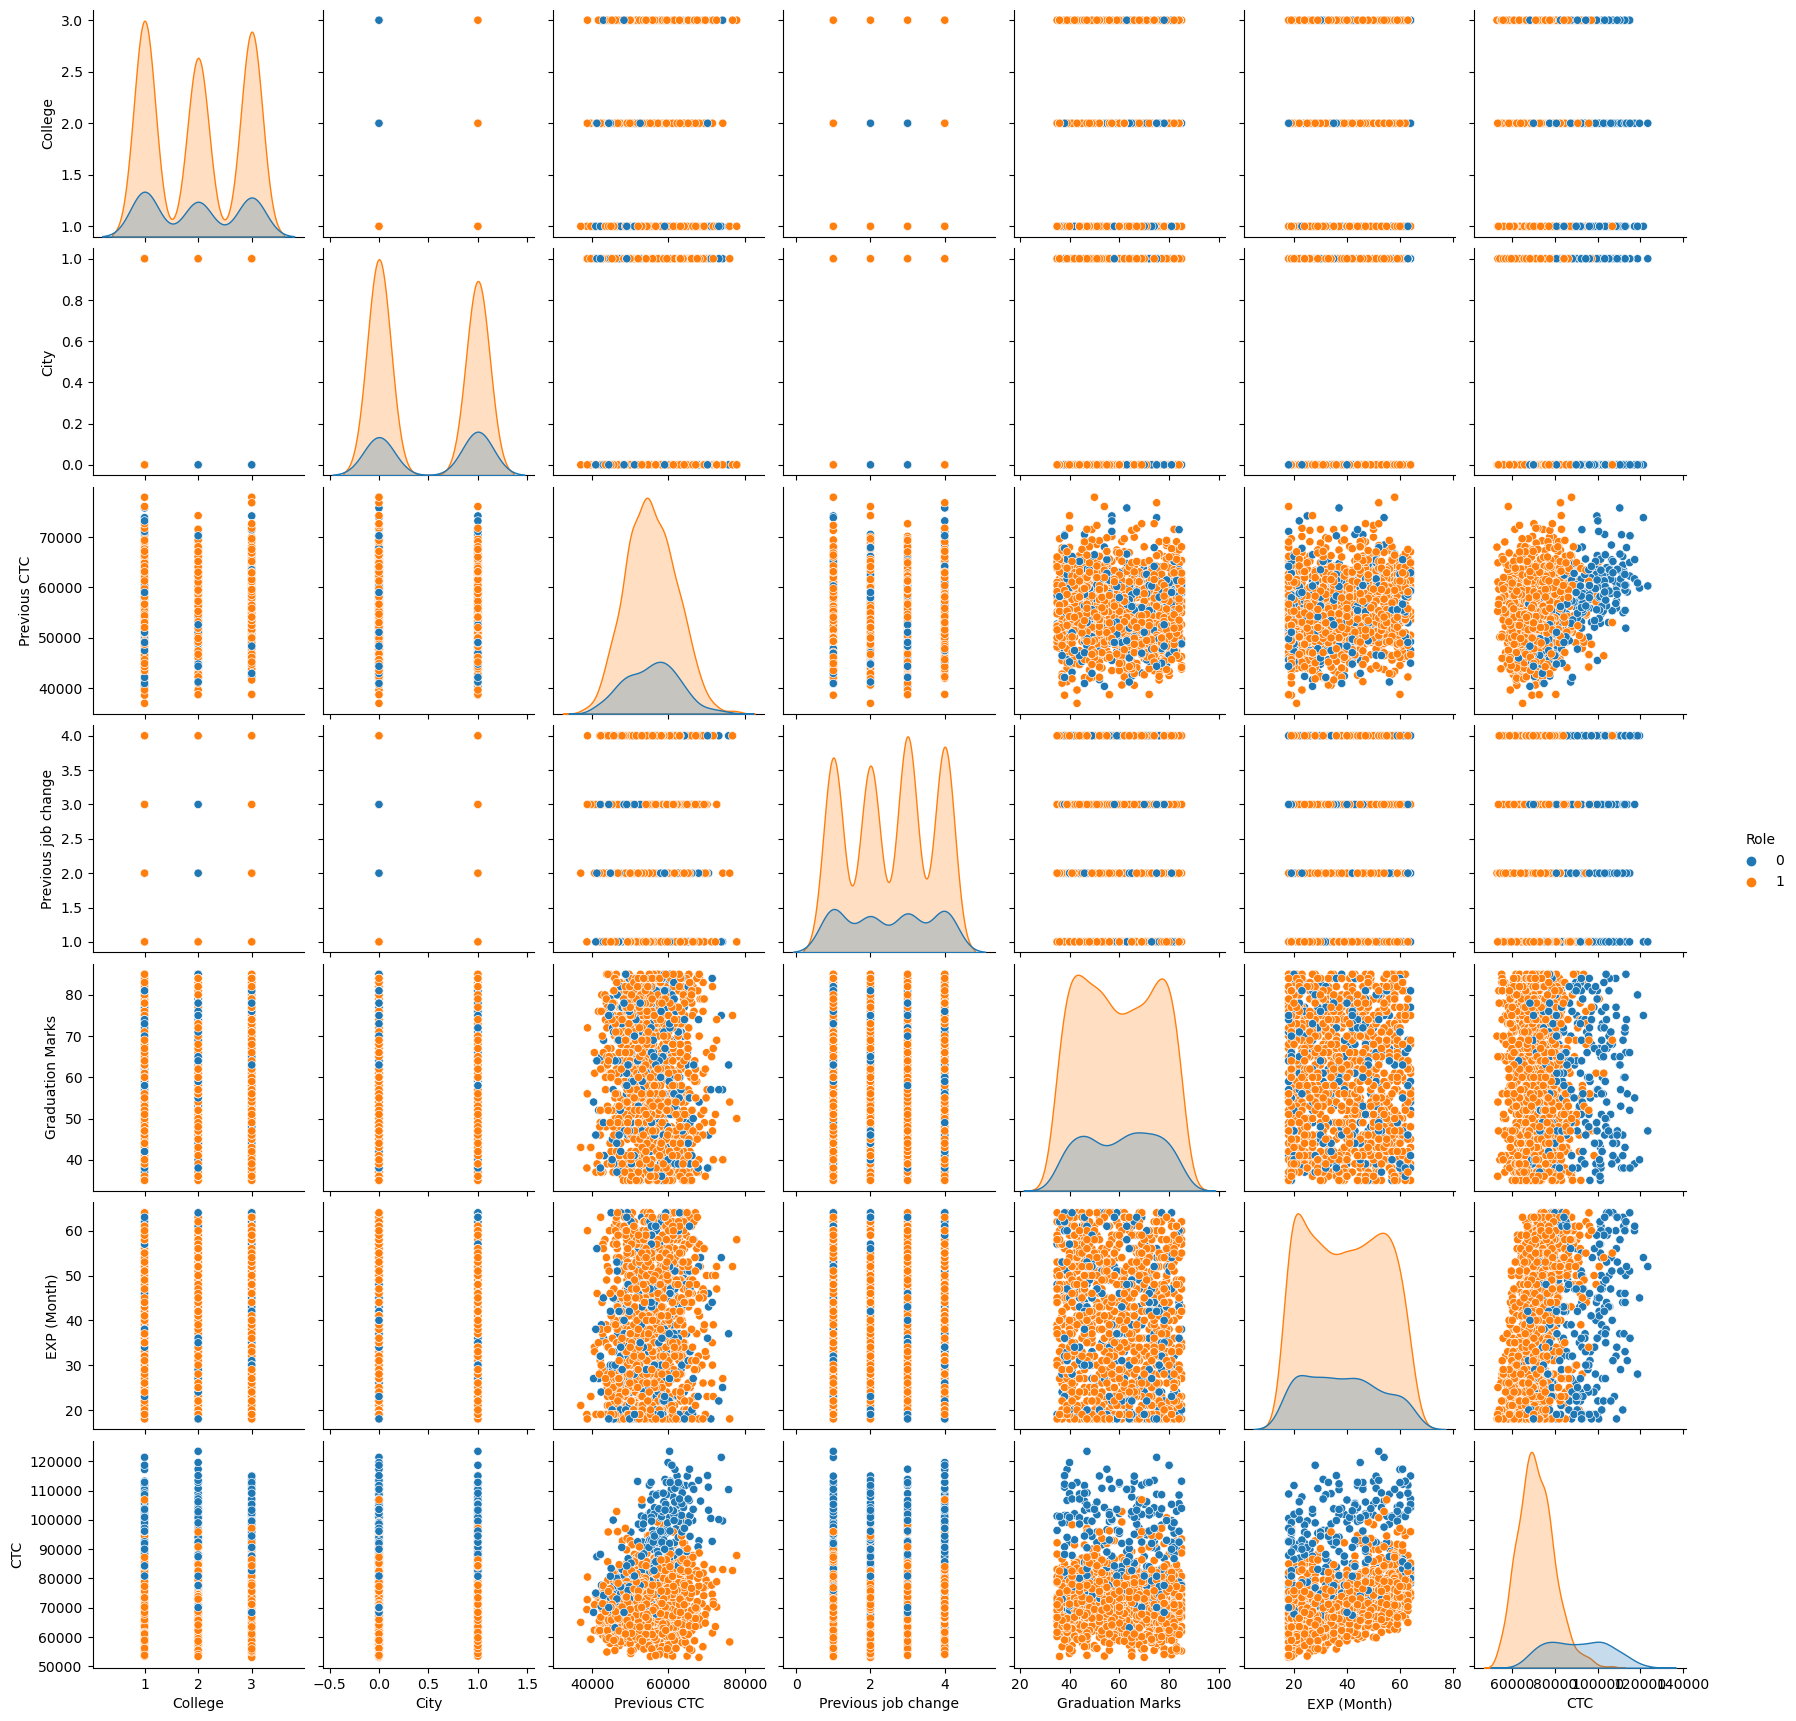

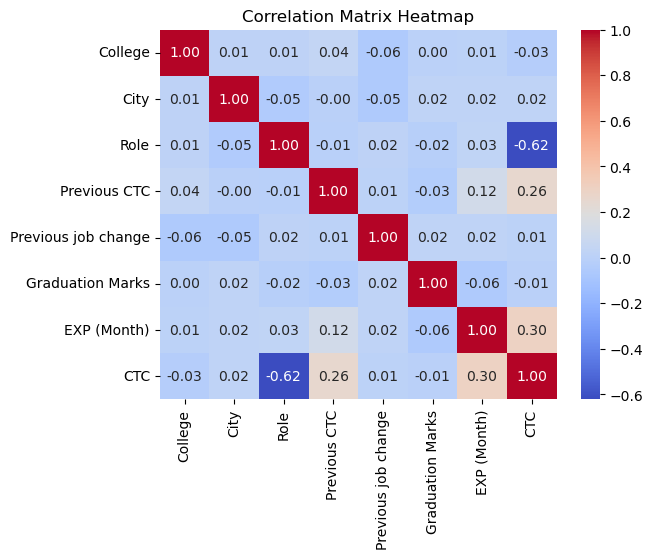

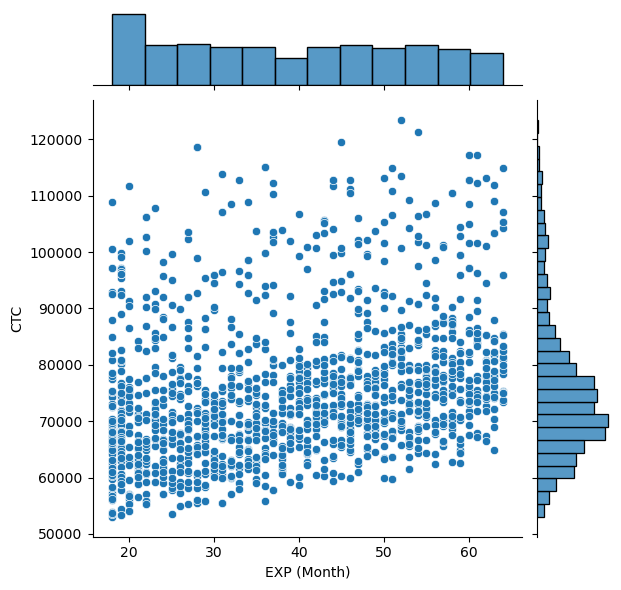

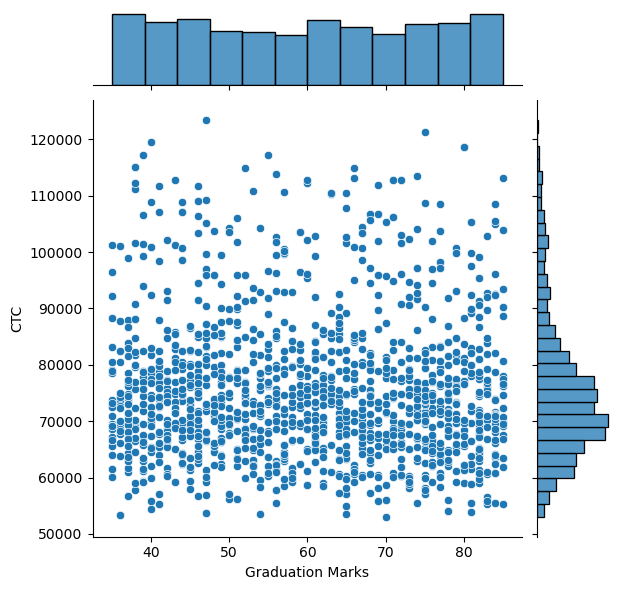

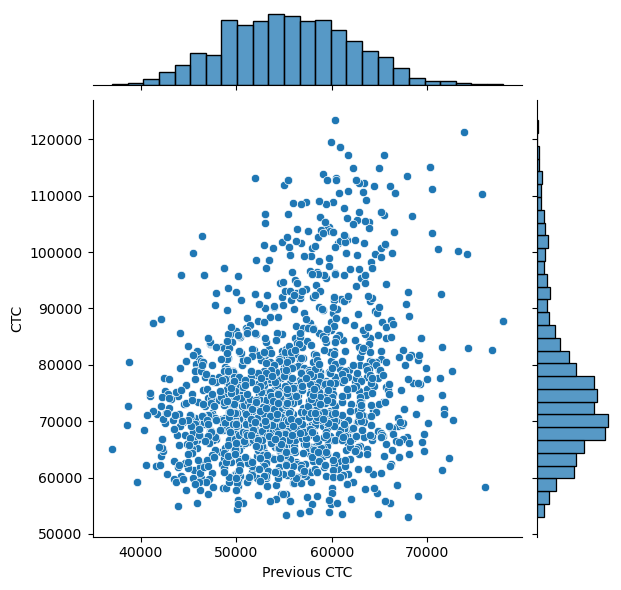

In [28]:
# Visualizations for Data Exploration
sns.pairplot(data, hue='Role', diag_kind='kde')
plt.show()

# Correlation Matrix Heatmap
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

sns.jointplot(x=data['EXP (Month)'],y=data['CTC'],data=data)
sns.jointplot(x=data['Graduation Marks'],y=data['CTC'],data=data)
sns.jointplot(x=data['Previous CTC'],y=data['CTC'],data=data)


Linear Regression 

R-squared: 0.5933517958385082


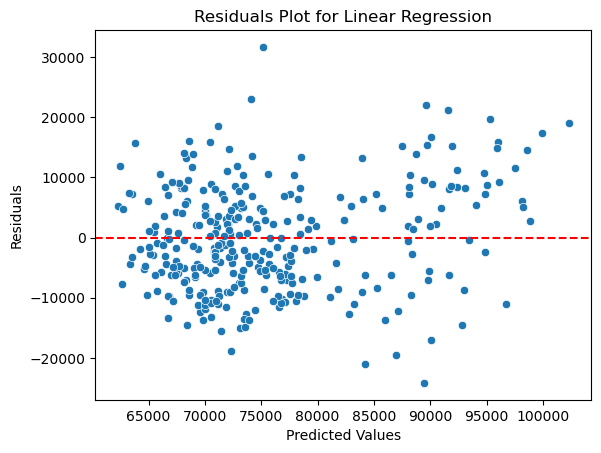

In [4]:
# Model Selection and Training

# Using Linear Regression as an example
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print('Linear Regression \n')
print(f'R-squared: {r2}')

# Residuals Plot for Linear Regression
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot for Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()



In [9]:
print(model.intercept_)

75284.838245476



Lasso Regression:
R-squared: 0.5929997366361246
Best alpha for Lasso: 10.0

Ridge Regression:
R-squared: 0.5919707789026041
Best alpha for Ridge: 10.0


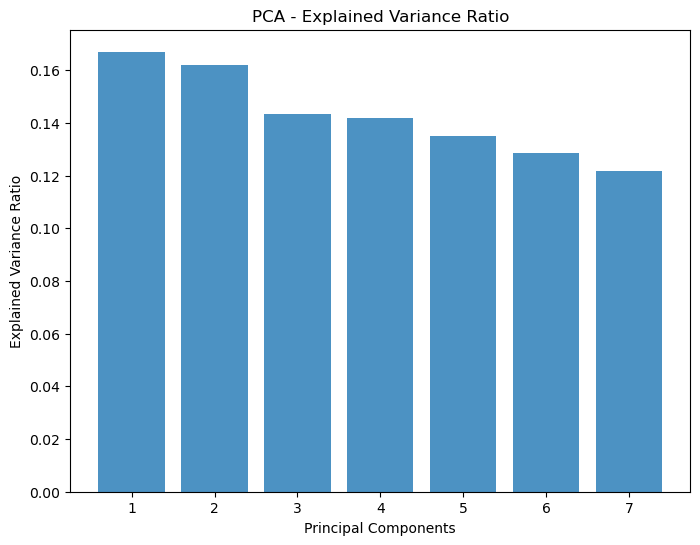

In [23]:

# Lasso Regression
from sklearn.linear_model import LassoCV
lasso_model = LassoCV(alphas=[0.01, 0.1, 1.0, 10.0], cv=5)
lasso_model.fit(X_train, y_train)

# Model Evaluation for Lasso
y_pred_lasso = lasso_model.predict(X_test)

r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression:")
print(f'R-squared: {r2_lasso}')
print(f'Best alpha for Lasso: {lasso_model.alpha_}')

# Ridge Regression
from sklearn.linear_model import RidgeCV
ridge_model = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0], cv=5)
ridge_model.fit(X_train, y_train)

# Model Evaluation for Ridge
y_pred_ridge = ridge_model.predict(X_test)

r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression:")
print(f'R-squared: {r2_ridge}')
print(f'Best alpha for Ridge: {ridge_model.alpha_}')

# PCA (Principal Component Analysis)
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA - Explained Variance Ratio')
plt.show()


Random Forest Regressor: 

R-squared: 0.6348685550858375


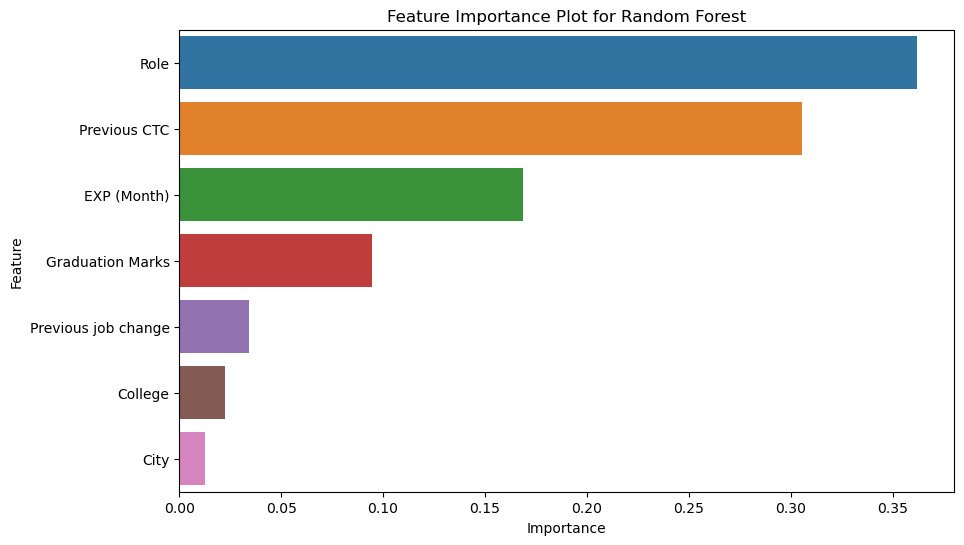

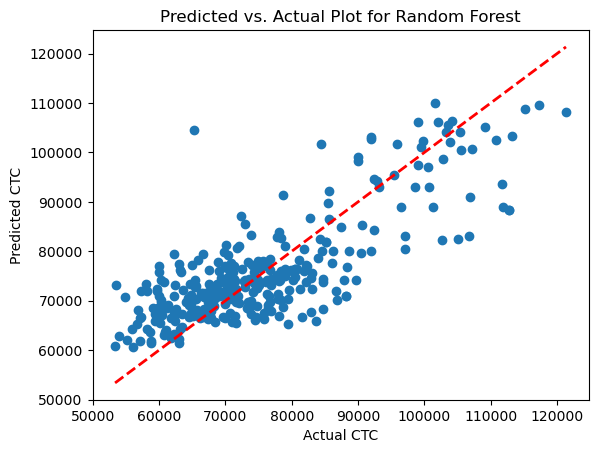


Best Random Forest Model after Hyperparameter Tuning:
R-squared: 0.6373900596965291
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [19]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Model Selection and Training for Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model Evaluation for Random Forest
y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor: \n")
print(f'R-squared: {r2_rf}')


# Feature Importance Plot for Random Forest
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance Plot for Random Forest')
plt.show()

# Predicted vs. Actual Plot for Random Forest
plt.scatter(y_test, y_pred_rf)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Predicted vs. Actual Plot for Random Forest')
plt.xlabel('Actual CTC')
plt.ylabel('Predicted CTC')
plt.show()




from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Best Random Forest Model
best_rf_model = grid_search_rf.best_estimator_

# Model Evaluation with the best Random Forest model
y_pred_best_rf = best_rf_model.predict(X_test)

r2_best_rf = r2_score(y_test, y_pred_best_rf)

print("\nBest Random Forest Model after Hyperparameter Tuning:")
print(f'R-squared: {r2_best_rf}')
print(f'Best Hyperparameters: {grid_search_rf.best_params_}')



AdaBoost Regressor:
R-squared: 0.5808437644487042


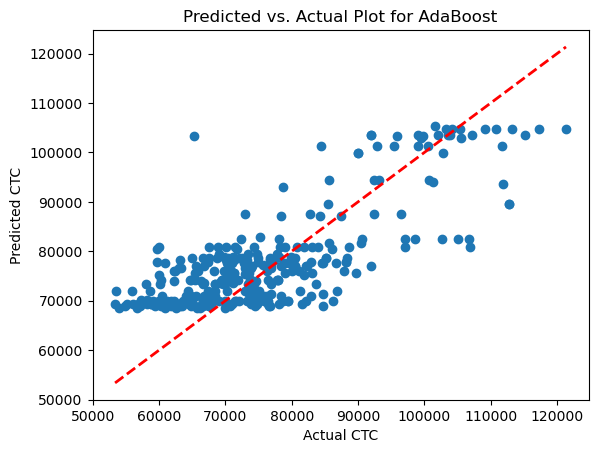


Best AdaBoost Model after Hyperparameter Tuning:
R-squared: 0.6117298047966
Best Hyperparameters: {'learning_rate': 0.01, 'n_estimators': 200}


In [20]:
# AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor

# Model Selection and Training for AdaBoost
ada_model = AdaBoostRegressor(n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train)

# Model Evaluation for AdaBoost
y_pred_ada = ada_model.predict(X_test)

mse_ada = mean_squared_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)

print("\nAdaBoost Regressor:")
print(f'R-squared: {r2_ada}')

# Predicted vs. Actual Plot for AdaBoost
plt.scatter(y_test, y_pred_ada)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Predicted vs. Actual Plot for AdaBoost')
plt.xlabel('Actual CTC')
plt.ylabel('Predicted CTC')
plt.show()

# Hyperparameter tuning for AdaBoost
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1, 1]
}

grid_search_ada = GridSearchCV(AdaBoostRegressor(random_state=42), param_grid_ada, cv=5)
grid_search_ada.fit(X_train, y_train)

# Best AdaBoost Model
best_ada_model = grid_search_ada.best_estimator_

# Model Evaluation with the best AdaBoost model
y_pred_best_ada = best_ada_model.predict(X_test)

mse_best_ada = mean_squared_error(y_test, y_pred_best_ada)
r2_best_ada = r2_score(y_test, y_pred_best_ada)

print("\nBest AdaBoost Model after Hyperparameter Tuning:")
print(f'R-squared: {r2_best_ada}')
print(f'Best Hyperparameters: {grid_search_ada.best_params_}')


NameError: name 'model' is not defined